In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
print(data)

    Life Expectancy  Accidental Deaths  Alzheimer's  Assault  \
0              76.7              97860        44536    16889   
1              76.8              97900        49558    16765   
2              77.0             101537        53832    20308   
3              77.0             106742        58866    17638   
4              77.6             109277        63457    17732   
5              77.5             112012        65965    17537   
6              77.6             117809        71599    18124   
7              77.8             121599        72432    18573   
8              78.1             123706        74632    18361   
9              78.2             121902        82435    17826   
10             78.5             118021        79003    16799   
11             78.7             120859        83494    16259   
12             78.7             126438        84974    16238   
13             78.8             127792        83637    16688   
14             78.8             130557  

In [4]:
data.describe()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Diabetes,Heart Diseases,Hypertension,Parkinson's,Suicide
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,77.982353,118618.235294,73958.176471,17383.705882,143411.647059,30696.294118,134125.294118,72722.411765,643509.000000,24895.823529,20485.823529,35581.058824
std,0.794698,13332.938487,16807.244406,1116.702163,14850.195091,4462.066544,10828.399072,3039.767797,43966.814716,4248.172978,3798.243364,4803.115610
min,76.700000,97860.000000,44536.000000,15872.000000,128546.000000,26259.000000,121987.000000,68399.000000,596577.000000,18073.000000,14593.000000,29199.000000
25%,77.500000,109277.000000,63457.000000,16688.000000,129476.000000,27257.000000,124583.000000,70553.000000,611105.000000,21940.000000,17989.000000,31655.000000
50%,78.100000,120859.000000,74632.000000,17537.000000,137119.000000,29165.000000,130933.000000,73138.000000,631636.000000,24902.000000,20058.000000,34598.000000
75%,78.700000,126438.000000,83637.000000,17826.000000,157689.000000,33642.000000,142943.000000,74219.000000,685089.000000,27853.000000,23111.000000,39518.000000
max,79.000000,146571.000000,110561.000000,20308.000000,167661.000000,40326.000000,155041.000000,79535.000000,725192.000000,32200.000000,27972.000000,44193.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
Life Expectancy              17 non-null float64
Accidental Deaths            17 non-null int64
Alzheimer's                  17 non-null int64
Assault                      17 non-null int64
Cerebrovascular Diseases     17 non-null int64
Chronic Liver                17 non-null int64
Chronic Lower Respiratory    17 non-null int64
Diabetes                     17 non-null int64
Heart Diseases               17 non-null int64
Hypertension                 17 non-null int64
Parkinson's                  17 non-null int64
Suicide                      17 non-null int64
dtypes: float64(1), int64(11)
memory usage: 1.7 KB


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
train.shape

(14, 12)

In [8]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [9]:
features = ["Accidental Deaths", "Alzheimer's", "Assault", "Cerebrovascular Diseases", "Chronic Liver", "Chronic Lower Respiratory", "Diabetes", "Heart Diseases", "Hypertension", "Parkinson's", "Suicide"]

In [10]:
x_train = train[features]
y_train = train["Life Expectancy"]

x_test = test[features]
y_test = test["Life Expectancy"]

In [11]:
y_test

0    76.7
2    77.0
4    77.6
Name: Life Expectancy, dtype: float64

In [12]:
target_x= "Assault"

In [13]:
target = data[[target_x]]

In [14]:
features = data.drop([target_x], axis= 1)

In [15]:
model = DecisionTreeRegressor()

In [16]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
y_pred = model.predict(x_test)

In [18]:
mean_squared_error(y_pred, y_test)

0.006666666666665909

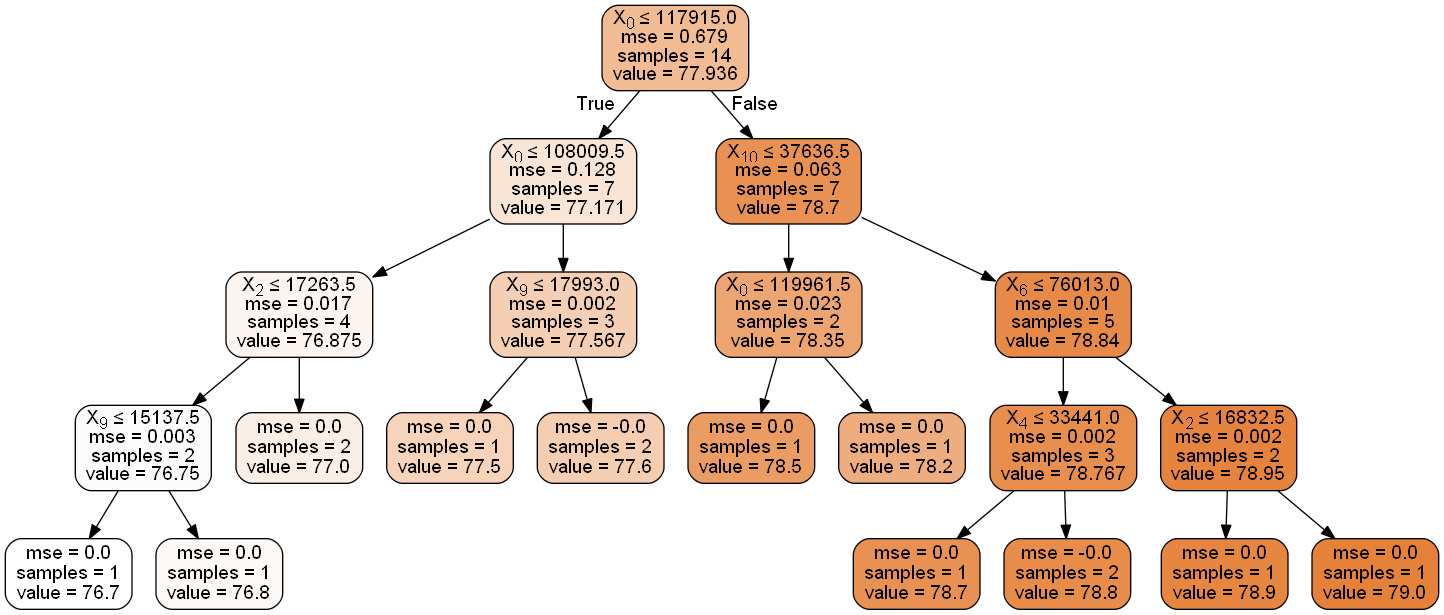

In [19]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())